# X.3 Exercises

## Exercise 1: Preparation and data exploration

Load the `diabetes` dataset from the `sklearnlibrary` and use `dataset.DESCR` to read the dataset description. A few weeks ago we used these variables to predict the presence of diabetes. This week, the goal is to explore the data, aiming to find underlying factors influencing the variables. Inspect the data and plot the correlation matrix.

           s1        s2        s3        s4        s5        s6
0   -0.044223 -0.034821 -0.043401 -0.002592  0.019907 -0.017646
1   -0.008449 -0.019163  0.074412 -0.039493 -0.068332 -0.092204
2   -0.045599 -0.034194 -0.032356 -0.002592  0.002861 -0.025930
3    0.012191  0.024991 -0.036038  0.034309  0.022688 -0.009362
4    0.003935  0.015596  0.008142 -0.002592 -0.031988 -0.046641
..        ...       ...       ...       ...       ...       ...
437 -0.005697 -0.002566 -0.028674 -0.002592  0.031193  0.007207
438  0.049341  0.079165 -0.028674  0.034309 -0.018114  0.044485
439 -0.037344 -0.013840 -0.024993 -0.011080 -0.046883  0.015491
440  0.016318  0.015283 -0.028674  0.026560  0.044529 -0.025930
441  0.083740  0.027809  0.173816 -0.039493 -0.004222  0.003064

[442 rows x 6 columns]


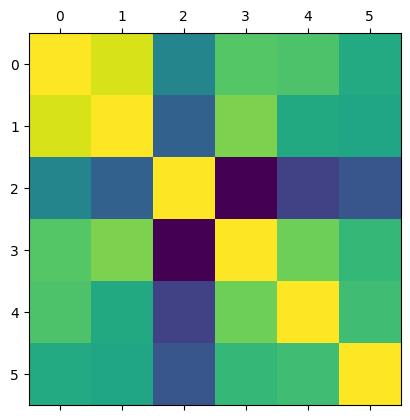

In [1]:
# Load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the diabetes dataset from sklearn
df = datasets.load_diabetes(as_frame=True)
# We only want the predictors
df = df.data
# Drop  not needed columns
df = df.drop(columns=['age', 'sex', 'bmi', 'bp'])


# Inspect the data


# Plot the correlation matrix


##solution
print(df)

plt.matshow(df.corr())
plt.show()

## Exercise 2: Fit the model

Use `factor_analyzer` package to fit a first non-rotated MINRES EFA model where n factors = n variables. After fitting the model, determine the number of factros using a method of your choice.  

[3.27565985 1.30852971 0.80016549 0.52650327 0.08052117 0.00862051]


Text(0, 0.5, 'eigenvalue')

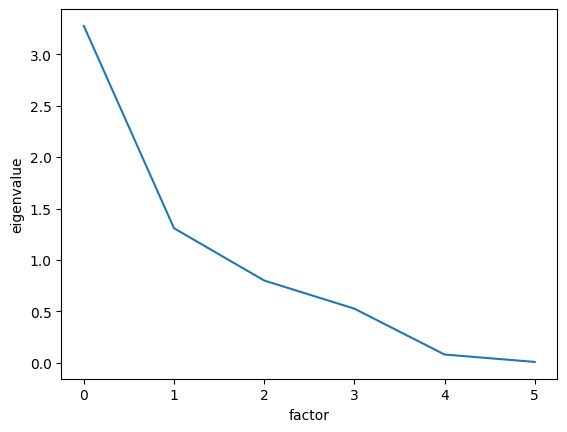

In [2]:
# Load packages
from factor_analyzer import FactorAnalyzer

# Fit the initial model

# Determine the number of factors

##solution
fa = FactorAnalyzer(rotation=None, method = 'minres', n_factors=6) #6 variables = max. 6 factors
fa.fit(df)

ev, cfev = fa.get_eigenvalues() 
print(ev)

plt.plot(ev)
plt.xlabel("factor")
plt.ylabel("eigenvalue")

## Exercise 3: Loadings & Communalities

After selecting the number of factors, fit a final model. Use a MINRES model, similar to the first model. This time, use oblimin roation. Print the rotated factor loadings and communalities. Do the communalities suggest a good model fit?

In [4]:
# Fit the final model

# Get factors loadings

# Get communalities

##solution
fa2 = FactorAnalyzer(n_factors=2, rotation='oblimin', method='minres')
fa2.fit(df)

l = fa2.loadings_
print(l)

c = fa2.get_communalities()
print(c)

[[ 1.04095052 -0.06391605]
 [ 0.79721715  0.14763963]
 [ 0.23543194 -0.9377997 ]
 [ 0.36511128  0.81892308]
 [ 0.33348504  0.4689968 ]
 [ 0.24832245  0.34203792]]
[1.08766324 0.65735264 0.93489648 0.80394125 0.33117028 0.17865398]


## Voluntary Exercise 1: Improve Fit

Look again at the Communalities again. Some variables are badly represented by the factor structure. Exclude them and fit the model again. Did the fit improve? 

In [5]:
# Exclude variables 

# Fit the model

# Get Loadings

# Get Communlaties 

##solution
df = df.drop(columns=['s5', 's6']) #s5 & s6 have low communalities, meaning they are not well represented by the factor structure

fa3 = FactorAnalyzer(n_factors=2, rotation='oblimin', method='minres')
fa3.fit(df)

l = fa3.loadings_
print(l)

c = fa3.get_communalities()
print(c)


[[ 1.017817    0.12752987]
 [ 0.89155588 -0.12630942]
 [ 0.13112868  1.01673845]
 [ 0.48566271 -0.70742639]]
[1.05221532 0.81082596 1.05095181 0.73632037]


## Voluntary Exercise 2: Interpretation

To interpret factor loadings and factors one needs to know what the variables measure as well as domain knowledge. Assume that the variables `s2` and `s1` represent `hours of physical exercise per week` and `amount of vegetables consumed in one week`, respectively. Further assume that the variables `s4` and `s3` represent `expression of a diabetes-protecting gene` and `amount of relatives having diabetes`, respectively. How could you interpret the two factors? Write a comment.

In [ ]:
# Interpretation 

#
#
#
#

##solution

# The items s1 and s2 load high on factor 1. As both variables represent behavior one might interpret the factor as `behavioral risk factors (of diabetes)`. 
# The items s3 and s4 load high on factor 2. As both variables represent genetic components one might interpret the factor as `genetic risk factors (of diabetes)`.